In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df= pd.read_excel('glass.xlsx',sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
df.iloc[:,:-1].corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [6]:
rows ,cols = df.iloc[:,:-1].shape
flds = list(df.iloc[:,:-1].columns)
corr = df.iloc[:,:-1].corr().values
for i in range(cols):
    for j in range(i+1,cols):
        if corr[i,j] > 0.5 or  corr[i,j] <- 0.5:
            print (flds[i], ' ', flds[j], ' ', np.round(corr[i,j],decimals=2))

RI   Si   -0.54
RI   Ca   0.81


<Axes: >

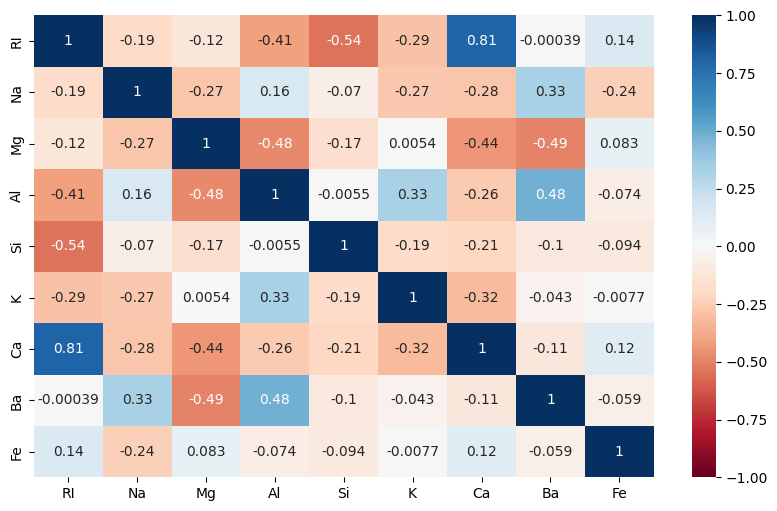

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.iloc[:,:-1].corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>]], dtype=object)

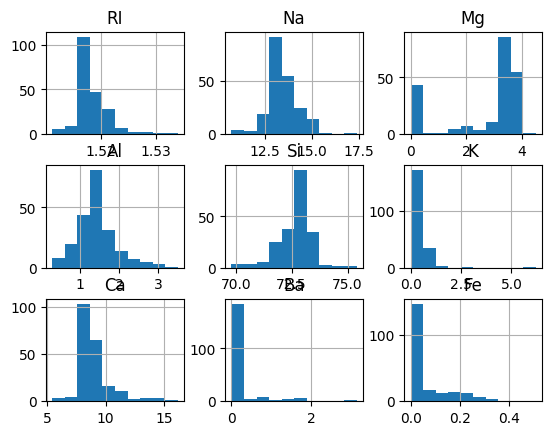

In [8]:
df.iloc[:,:-1].hist()

<Axes: >

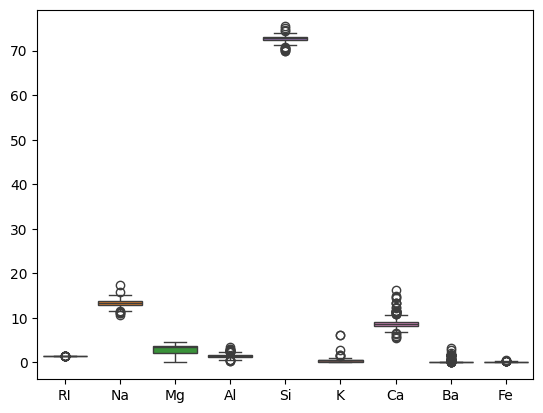

In [9]:
sns.boxplot(df.iloc[:,:-1])
# except Mg all features have outliers

In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
model = RandomForestClassifier(n_estimators=100, max_features=3,max_depth=6, random_state=42)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7673160173160174


In [12]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1,random_state=42,stratify=y)

In [13]:
model=RandomForestClassifier(n_estimators=100,max_features=3,max_leaf_nodes=10,random_state=42)
model.fit(train_x,train_y)

RandomForestClassifier(max_features=3, max_leaf_nodes=10, random_state=42)

In [14]:
print(classification_report(model.predict(test_x),test_y))

              precision    recall  f1-score   support

           1       0.71      0.71      0.71         7
           2       0.88      0.70      0.78        10
           3       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.77        22
   macro avg       0.68      0.74      0.69        22
weighted avg       0.83      0.77      0.79        22



In [15]:
train_x.shape,train_y.shape

((192, 9), (192,))

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
cart = DecisionTreeClassifier()
model_bag = BaggingClassifier(estimator=cart, n_estimators=500, max_features=3, bootstrap=False, random_state=42)
model_bag.fit(train_x, train_y)
y_pred_bagging = model_bag.predict(test_x)

In [17]:
print(classification_report(model_bag.predict(test_x),test_y))

              precision    recall  f1-score   support

           1       0.86      0.75      0.80         8
           2       0.62      0.83      0.71         6
           3       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       1.00      0.75      0.86         4

    accuracy                           0.77        22
   macro avg       0.83      0.81      0.78        22
weighted avg       0.82      0.77      0.78        22



In [18]:
model_boost = AdaBoostClassifier(n_estimators=1000,learning_rate=0.001, random_state=42)
model_boost.fit(train_x,train_y)

AdaBoostClassifier(learning_rate=0.001, n_estimators=1000, random_state=42)

In [19]:
print(classification_report(model_boost.predict(test_x),test_y))

              precision    recall  f1-score   support

           1       0.86      0.50      0.63        12
           2       0.50      0.50      0.50         8
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.67      1.00      0.80         2

    accuracy                           0.55        22
   macro avg       0.34      0.33      0.32        22
weighted avg       0.71      0.55      0.60        22



In [ ]:
1)Explain Bagging and Boosting methods. How is it different from each other.

Bagging(Bootstrap Aggregating):
Bagging generates multiple subsets of the training data by sampling with replacement.Each subset is used to train a seperate model. The final prediction is obtained by averaging the predictions of the individual models or voting in classification tasks

Boosting:
Boosting focuses on training weak learners. Each new model is trained to focus on the mistakes made by the previous models

Differeneces:
Bagging                                  Boosting
1)Reduce Variance                        1)Reduce both bias and variance
2)Parallel Model Training                2)Sequential model training
3)Each model is independent              3)Each model corrects the errors
                                           of Pevious model
4)Reduces over fitting                   4)Tries to reduce bias and                                        improve generalisation

In [ ]:
2)Explain how to handle imbalance in the data
Imbalanced datasets are those where the number of instances in one class significantly outweighs the instances in another class
Techniques to Handle Imbalanced Data:
1)Resampling Techniques:
Over sampling:Increase the number of nstances in the minority class by replicating or creating synthetic samples
UnderSampling:Reduce the number of instances in the majority class to balance with the minority class
2)Class Weight Adjustment
3)nomaly Detection Techniques:
For highly imbalanced datasets, you can treat the minority class as outliers or anomalies. Algorithms like Isolation Forest and One-Class SVM are used to detect anomalies in such cases
4)Evaluation Metrics:
Accuracy is not a good metric for imbalanced datasets because it can be biased by the majority class. Instead, use metrics that account for class imbalance, such as:
Precision: Proportion of true positives among all positive predictions.
Recall (Sensitivity): Proportion of true positives among all actual positives.
F1-Score: Harmonic mean of Precision and Recall, balancing both.
5)Ensemble Methods:
Some ensemble methods, like Boosting (AdaBoost, XGBoost) or Balanced Random Forest, can handle imbalance better as they focus on correcting mistakes iteratively, including those related to minority class samples.